# Semana 4 - Dia 1: K-Means 🟢
Exemplo prático de clustering com scikit-learn.

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## 1) Criando dataset artificial

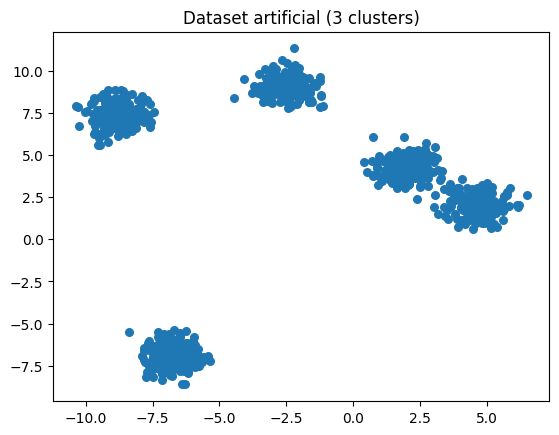

In [87]:
# Criar dataset com 3 clusters
X, y = make_blobs(n_samples=1000, centers=5, cluster_std=0.6, random_state=42)

plt.scatter(X[:,0], X[:,1], s=30)
plt.title("Dataset artificial (3 clusters)")
plt.show()

## 2) Treinando K-Means

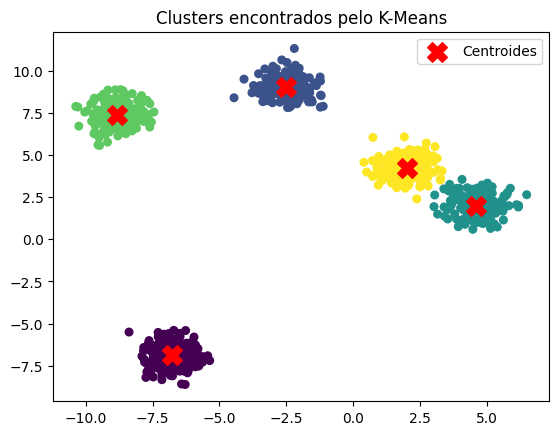

In [88]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap="viridis", s=30)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            c='red', marker='X', s=200, label='Centroides')
plt.legend()
plt.title("Clusters encontrados pelo K-Means")
plt.show()

## 3) Avaliando os clusters

In [95]:
inertia = kmeans.inertia_  # soma das distâncias ao centróide
sil_score = silhouette_score(X, y_pred)

print("Inertia (SSE):", inertia)
print("Silhouette Score:", sil_score)

Inertia (SSE): 698.7711305676505
Silhouette Score: 0.7967447329814222


## 4) Escolhendo K com método do cotovelo

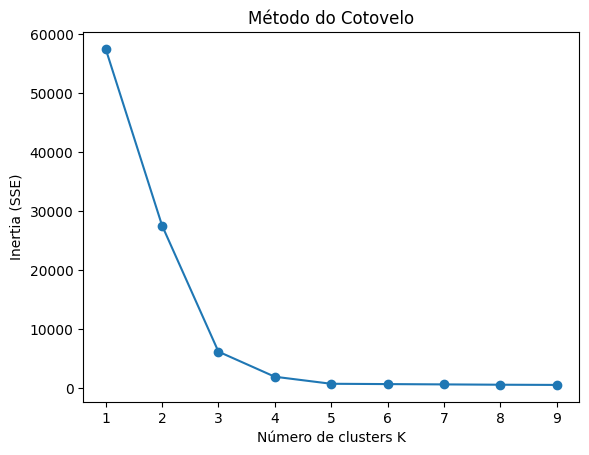

In [90]:
inertias = []
K_range = range(1, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(K_range, inertias, '-o')
plt.xlabel('Número de clusters K')
plt.ylabel('Inertia (SSE)')
plt.title('Método do Cotovelo')
plt.show()

## Extra) Analisar dados de vinho usando K-Means

In [91]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [92]:
# 1) Carregar dataset Wine
wine = load_wine()
X_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
y_wine = wine.target  # só para avaliar depois

# Padronizar os dados (importante para K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_wine)

print("Formato:", X_scaled.shape)

Formato: (178, 13)


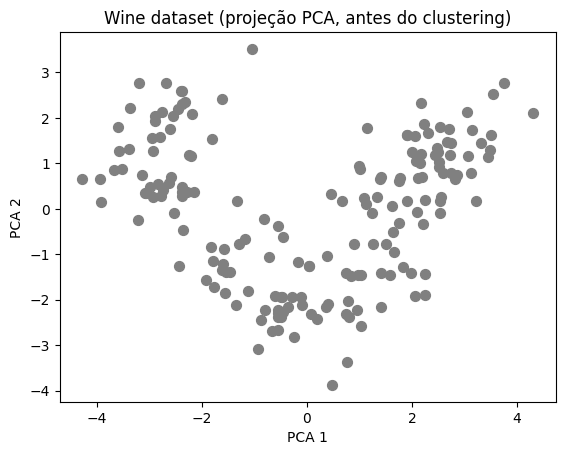

In [93]:
# Reduzir para 2 dimensões com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotar
plt.scatter(X_pca[:,0], X_pca[:,1], s=50, color="gray")
plt.title("Wine dataset (projeção PCA, antes do clustering)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [97]:
# 2) Rodar K-Means
kmeans_wine = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred_wine = kmeans_wine.fit_predict(X_scaled)

In [98]:
# 3) Avaliação
print("Inertia (SSE):", kmeans_wine.inertia_)
print("Silhouette Score:", silhouette_score(X_scaled, y_pred_wine))

Inertia (SSE): 1277.928488844642
Silhouette Score: 0.2848589191898987


In [100]:
# 4) Comparação opcional com rótulos reais
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(y_wine, y_pred_wine)
print("Adjusted Rand Index (comparação com rótulos reais):", ari)

Adjusted Rand Index (comparação com rótulos reais): 0.8974949815093207


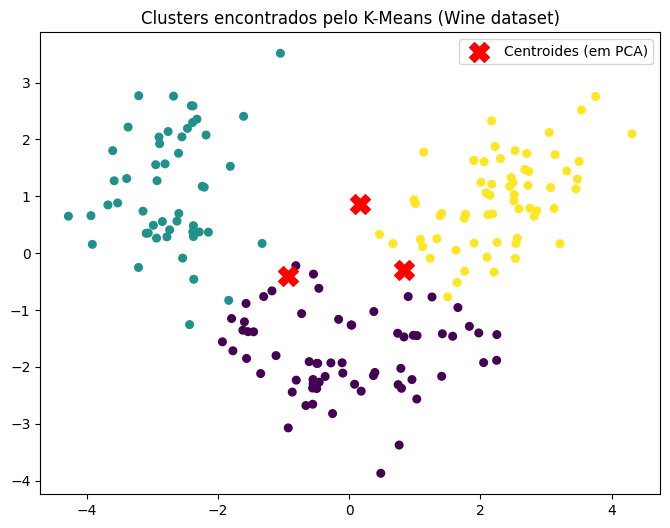

In [101]:
# 5) Visualização em 2D (redução com PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred_wine, cmap="viridis", s=30)
plt.scatter(kmeans_wine.cluster_centers_[:,0], kmeans_wine.cluster_centers_[:,1],
            c='red', marker='X', s=200, label="Centroides (em PCA)")
plt.title("Clusters encontrados pelo K-Means (Wine dataset)")
plt.legend()
plt.show()

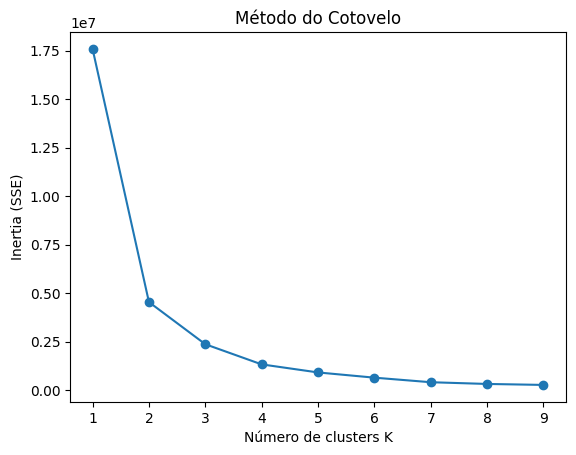

In [102]:
inertias = []
K_range = range(1, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_wine)
    inertias.append(km.inertia_)

plt.plot(K_range, inertias, '-o')
plt.xlabel('Número de clusters K')
plt.ylabel('Inertia (SSE)')
plt.title('Método do Cotovelo')
plt.show()

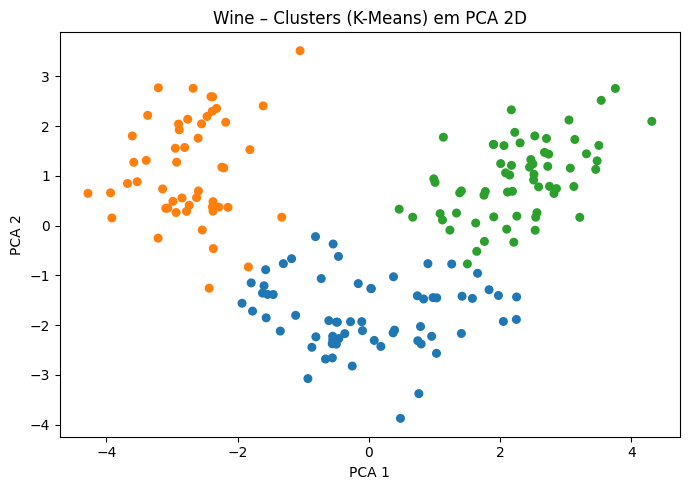

In [107]:
colors = np.array(["#1f77b4", "#ff7f0e", "#2ca02c"])  # 3 clusters

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=colors[y_pred_wine], s=30)
plt.title("Wine – Clusters (K-Means) em PCA 2D")
plt.xlabel("PCA 1"); plt.ylabel("PCA 2")
plt.tight_layout(); plt.show()